<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Deep_Learning/blob/main/Simple_Neural_Network_using_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/StatQuest/signa/blob/main/chapter_01/images/chapter_1_pre_trained_nn_labeled.png?raw=1" alt="a pre-trained neural network" style="width: 800px;">

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
class myNN(nn.Module):
  def __init__(self) -> None:
    ## The __init__() method is called when we create an object
    ## from this class. This is where we create and initialize the
    ## weights and biases in the neural network.
    super().__init__()

    self.w1 = torch.tensor(1.43)
    self.b1 = torch.tensor(-0.61)

    self.w2 = torch.tensor(2.63)
    self.b2 = torch.tensor(-0.27)

    self.w3 = torch.tensor(-3.89)
    self.w4 = torch.tensor(1.35)

  def forward(self, input_values):
    ## The forward() method is called by default when we pass
    ## values to an object created from this class.
    ## This is where we do the math associated with running
    ## data through the neural network.

    top_x_axis_values = (input_values * self.w1) + self.b1
    bottom_x_axis_values = (input_values * self.w2) + self.b2

    top_y_axis_values = F.relu(top_x_axis_values)
    bottom_y_axis_values = F.relu(bottom_x_axis_values)

    output_values = (top_y_axis_values * self.w3) + (bottom_y_axis_values * self.w4)

    return output_values

In [6]:
model = myNN()

In [7]:
doses = torch.tensor([0.0,0.5,1.0])

In [8]:
model(doses)

tensor([ 0.0000,  1.0023, -0.0038])

In [9]:
torch.round(model(doses), decimals=2)

tensor([0., 1., -0.])

## Drawing a graph of the output from the top activation function relative to the input values.

In [11]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [12]:
top_x_axis_values = (model.w1 * input_doses) + model.b1
top_x_axis_values

tensor([-0.6100, -0.4670, -0.3240, -0.1810, -0.0380,  0.1050,  0.2480,  0.3910,
         0.5340,  0.6770,  0.8200])

In [13]:
top_y_axis_values = F.relu(top_x_axis_values)
top_y_axis_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1050, 0.2480, 0.3910, 0.5340,
        0.6770, 0.8200])

Text(0.5, 0, 'Dose')

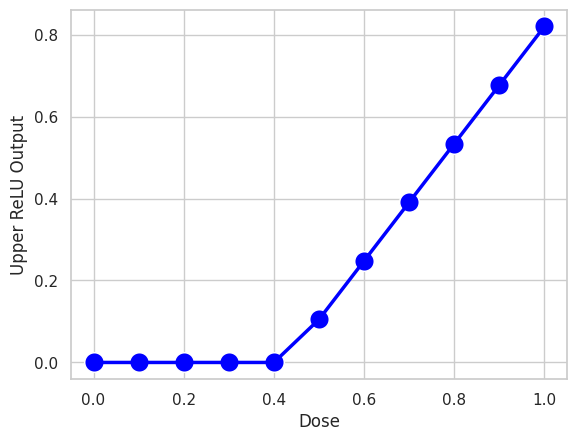

In [15]:
sns.set(style = "whitegrid")
sns.scatterplot(x = input_doses,
                y = top_y_axis_values,
                color="blue",
                s=200)

## now connecting the points with line
sns.lineplot(x = input_doses,
             y = top_y_axis_values,
             color = 'blue',
             linewidth = 2.5)

plt.ylabel('Upper ReLU Output')
plt.xlabel("Dose")

## Drawing a graph of the output from the bottom activation function relative to the input values.

In [16]:
bottom_x_axis_values = (model.w2 * input_doses) + model.b2
bottom_x_axis_values

tensor([-0.2700, -0.0070,  0.2560,  0.5190,  0.7820,  1.0450,  1.3080,  1.5710,
         1.8340,  2.0970,  2.3600])

In [17]:
bottom_y_axis_values = F.relu(bottom_x_axis_values)
bottom_y_axis_values

tensor([0.0000, 0.0000, 0.2560, 0.5190, 0.7820, 1.0450, 1.3080, 1.5710, 1.8340,
        2.0970, 2.3600])

Text(0.5, 0, 'Dose')

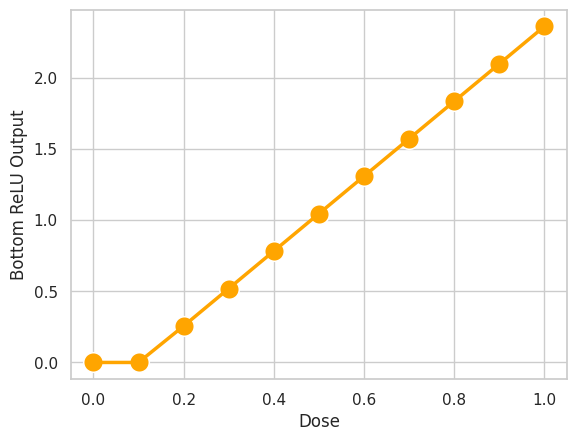

In [19]:
sns.set(style = "whitegrid")
sns.scatterplot(x = input_doses,
                y = bottom_y_axis_values,
                color="orange",
                s=200)

## now connecting the points with line
sns.lineplot(x = input_doses,
             y = bottom_y_axis_values,
             color = 'orange',
             linewidth = 2.5)

plt.ylabel('Bottom ReLU Output')
plt.xlabel("Dose")

## Drawing a graph of the outputs from the top and bottom activation functions relative to the input values.

Text(0.5, 0, 'Dose')

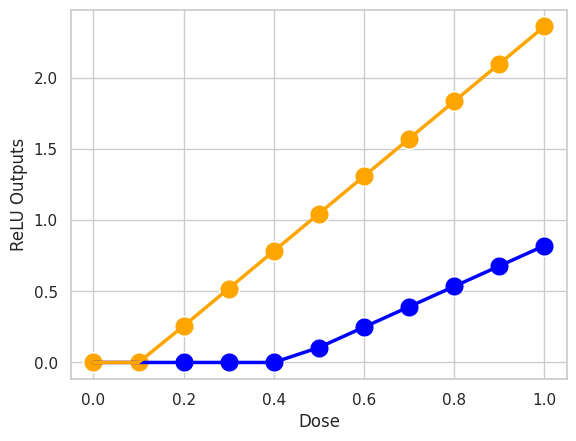

In [23]:
sns.set(style = "whitegrid")

sns.scatterplot(x = input_doses,
                y = top_y_axis_values,
                color="blue",
                s=200)

sns.lineplot(x = input_doses,
             y = top_y_axis_values,
             color="blue",
             linewidth = 2.5)

sns.scatterplot(x = input_doses,
                y= bottom_y_axis_values,
                color = 'orange',
                s=200)

sns.lineplot(x = input_doses,
             y = bottom_y_axis_values,
             color = 'orange',
             linewidth = 2.5)

plt.ylabel('ReLU Outputs')
plt.xlabel("Dose")

## Now stretching those bent shapes by scaling them by the final weights in the neural network

In [24]:
final_top_y_axis_values = top_y_axis_values * model.w3
final_top_y_axis_values

tensor([-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.4084, -0.9647, -1.5210,
        -2.0773, -2.6335, -3.1898])

In [25]:
final_bottom_y_axis_values = bottom_y_axis_values * model.w4
final_bottom_y_axis_values

tensor([0.0000, 0.0000, 0.3456, 0.7007, 1.0557, 1.4108, 1.7658, 2.1209, 2.4759,
        2.8310, 3.1860])

Text(0.5, 0, 'Dose')

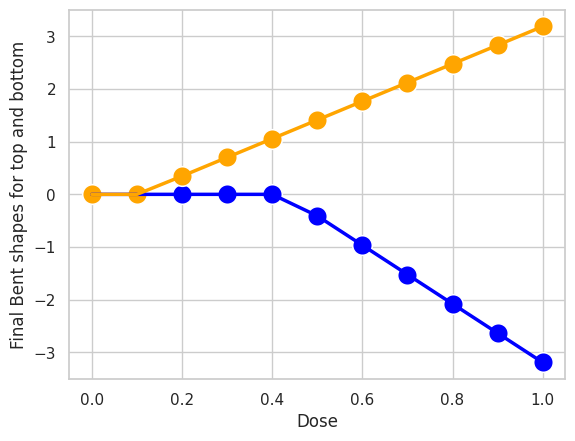

In [29]:
sns.set(style="whitegrid")

sns.scatterplot(x = input_doses,
                y = final_top_y_axis_values,
                color = 'blue',
                s=200)
sns.lineplot(x = input_doses,
             y = final_top_y_axis_values,
             color = 'blue',
             linewidth = 2.5)

sns.scatterplot(x = input_doses,
                y = final_bottom_y_axis_values,
                color = 'orange',
                s=200)
sns.lineplot(x = input_doses,
             y = final_bottom_y_axis_values,
             color = 'orange',
             linewidth = 2.5)
plt.ylabel("Final Bent shapes for top and bottom")
plt.xlabel("Dose")

## Lastly, let's show final bent shape that we get when we add together the two bent shapes.

In [30]:
final_bent_shape = final_top_y_axis_values + final_bottom_y_axis_values
final_bent_shape

tensor([ 0.0000,  0.0000,  0.3456,  0.7007,  1.0557,  1.0023,  0.8011,  0.5999,
         0.3986,  0.1974, -0.0038])

Text(0.5, 0, 'Dose')

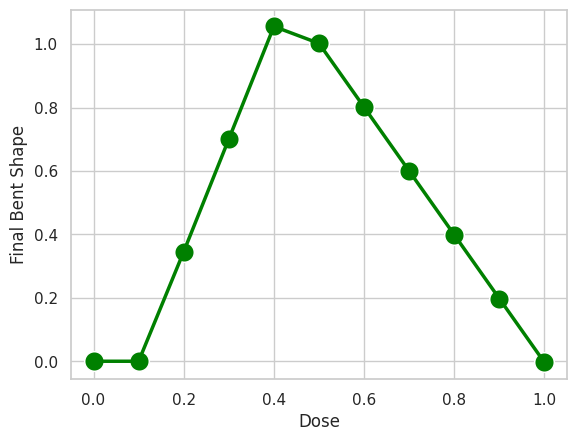

In [31]:
sns.set(style="whitegrid")

sns.scatterplot(x = input_doses,
                y = final_bent_shape,
                color = "green",
                s = 200)
sns.lineplot(x = input_doses,
             y = final_bent_shape,
             color = "green",
             linewidth = 2.5)
plt.ylabel("Final Bent Shape")
plt.xlabel("Dose")